# pre-trained 모델
https://github.com/Golbstein/Fingernails-Segmentation
---



#drive mount(이미지 구글드라이브안에있음)

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#라이브러리 + 구글드라이브 주소씀 / utils_nails -> py파일인데, 코랩이랑 호환안되는거있어서 py파일뜯어서 안되는거 수정함

In [2]:
import sys
sys.path.append('/content/gdrive/MyDrive/capstone/segmentation/fs/fs')

%matplotlib inline
import utils_nails
from utils_nails import *

datasetpath='/content/gdrive/MyDrive/capstone/segmentation/fs/fs/nails.tar.gz'

import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

#model이 class로정의 -> tar(zip)파일 되어있는거 주소 불러오기 -> unet

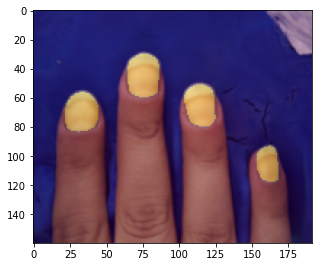

In [3]:
# initialize instance
# dataset = datasetpath
seg = fingernailseg(datasetpath)
# show random example from training set
seg.plot_example(np.random.randint(seg.X_train.__len__()))
# create U-Net model
seg.create_unet()

# unet->학부연수생때한거 U자모양이고, 사진많이필요없음 ->U자모형모델 ->대신 오래걸림(이미지 template matching처럼 이미지 복사하는거였나?)

#epoch 50인데 earlystopping있음 /대략 10분인데 시간없으면 그냥 py뜯어서 10으로수정해도됨

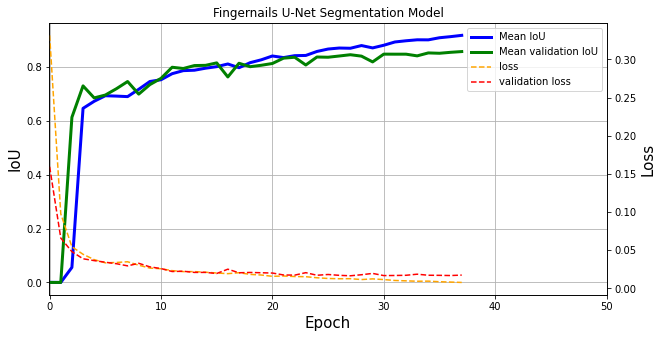

Epoch 00038: early stopping


In [4]:
seg.fit()
seg.load_model()

# model.predict안에 함수를 따로정의해서 input 자체가 X_test임 -> raw그리고 그위에 mask덮은듯

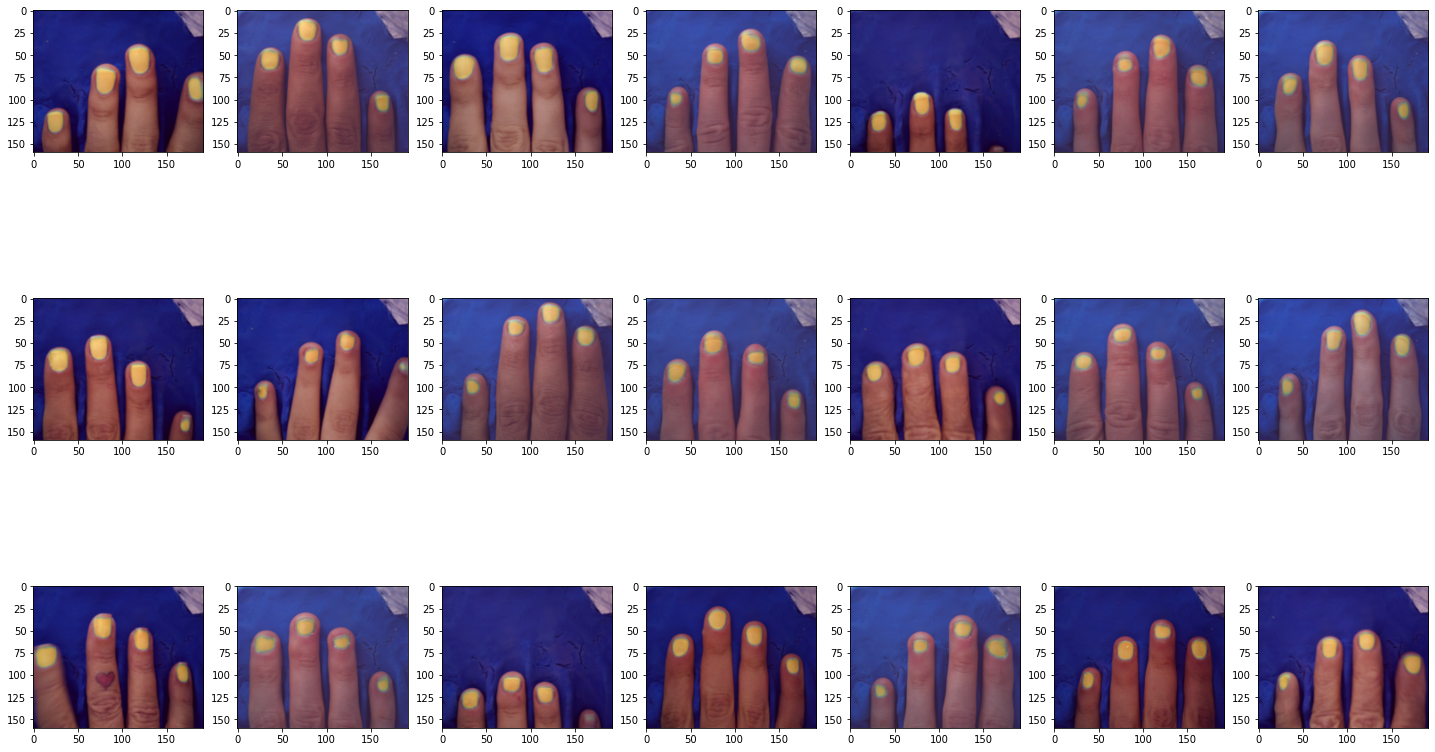

In [121]:
mask = seg.predict()
raw = seg.X_test
plt.figure(figsize=(25,15))
for i in range(len(mask)):
    plt.subplot(3, 7, i+1)
    plt.imshow(raw[i])
    plt.imshow(mask[i,:,:,0], alpha=0.3)

#mask된거 중 첫장/ 마지막 채널이 1개임

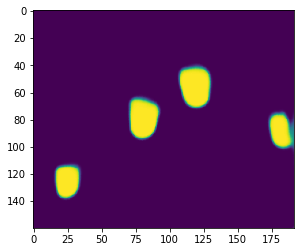

In [122]:
plt.imshow(mask[0,:,:,-1])

# 예측후에 X_test가 21장 -> 21장중 random으로해서 한장 raw그리고 그위에 mask

Text(0.5, 1.0, 'Fingernails segmentation of test image')

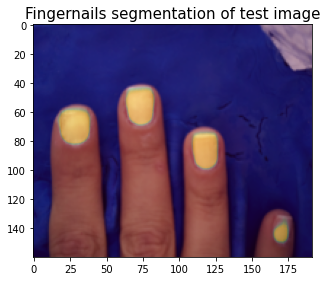

In [126]:
mask = seg.predict()
plt.figure(figsize=(5,5))

rand_image = np.random.randint(seg.X_test.__len__())
plt.imshow(raw[rand_image,:,:,:])
plt.imshow(mask[rand_image,:,:,0], alpha=0.3)
plt.title('Fingernails segmentation of test image', fontsize=15)

# 제공되는 이미지로 실험 -> 마스크한장,raw한장으로 symmetric_difference해보려했는데 일단 set이아님 그리고 None,160,192,3 vs 32,192,3 이었던거생각해서 애초에 input이 list구나 다시보게됨

In [38]:
#제공이미지
b=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/mk.png')
c=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/rw.png')
# d=set(b).symmetric_difference(c)
c=np.array(c.resize((192,160)))
c=np.array(c).astype('float32')
c/=255

# 그냥손 +검은색배경손해봤는데 안됨 -> zip파일풀어서 특징보니까 파란색 -> 맨처음에 스택오버플로우에서 봤던것처럼 크로마키색이 그린인 이유가 있겠구나 ->노트북에 파란색배경띄워서 1313번사진저장

In [115]:
#내손사진
a=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/11.jpg')
b=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/114.jpg')
c=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/0.jpg')
d=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/88.jpg')
e=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/000.jpg')
f=Image.open('/content/gdrive/MyDrive/capstone/segmentation/fs/fs/1313.jpg')
test=[]
a=np.array(a.resize((192,160)))
b=np.array(b.resize((192,160)))
c=np.array(c.resize((192,160)))
d=np.array(d.resize((192,160)))
e=np.array(e.resize((192,160)))
f=np.array(f.resize((192,160)))
test.append(a)
test.append(b)
test.append(c)
test.append(d)
test.append(e)
test.append(f)
test=np.array(test).astype('float32')
test/=255

ans=seg.model.predict(test,batch_size=4,verbose=0)

# 밑의 두사진이 1313번 mask, raw 이미지 

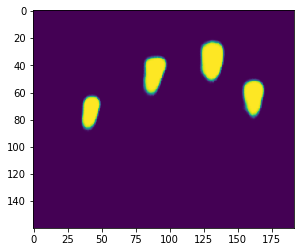

In [117]:
plt.imshow(ans[-1,:,:,-1])

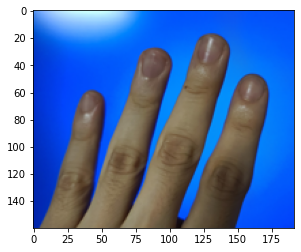

In [118]:
plt.imshow(test[-1,:,:])

# TODO
- util_nails에 mean 왜? /모듈의미봐야함  
- predict된 이미지 각 채널의 의미?(특히마지막)  
- masking된거 alpha의미?+조절해야함/색깔못바꾸나  
- model.predict()의 input에서 batch_size=4, verbose=0의 의미 알기+ 다른 input있나?    
# 과정
- 일반화질동영상->프레임별사진->리사이즈->파란색배경->mask좌표->gan합성->원래이미지에합성->동영상변환  
# 사실(시도)
- 1313번 사진 화질낮아도 ㄱㅊ은듯  
- 이미지오픈->리사이즈->리스트어펜드->리스트 array로만들고 float32 ->나누기 255  
# 참고
- 원그렸던거 참고해서 모델합치기?  
- 3D프린팅 및헤나? 문신vs헤나/염색vs헤어 매니큐어같은관계  
- 자신에게맞는손 및손톱인식->네일아트선택->3D프린팅(헤나or젤네일키트)/기본형이 아닌 내손에 맞는사이즈/메이커스페이스(무료),굴곡?